In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%store

Stored variables and their in-db values:
arch_capacity_geometry_variables                -> {'b': 1, 't': 0.5, 'e': 0.08333333333333333}
compressive_resistance_realisations             -> array([6.07743858, 4.41155859, 6.34456247, ..., 6.
compressive_resistances                         -> [4.691352777703492, 6.2279668592488475]
condition_factor                                -> [[0.7200000000000001, 0.7200000000000001, 0.720000
convergence_simulation_number                   -> 100000
df_arch_compressive_capacity                    ->    scour depth  condition factor           0      
pier_local_scour_depth                          -> [[0.0, 0.2888888888888889, 0.5777777777777778, 0.8


22
2.2


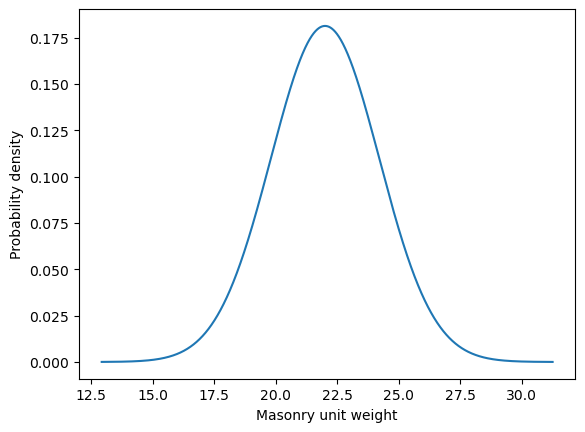

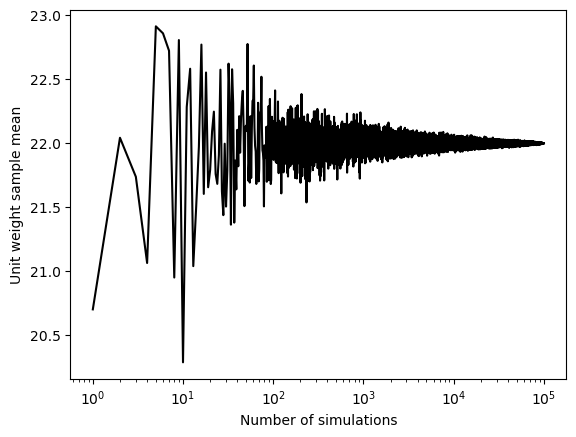

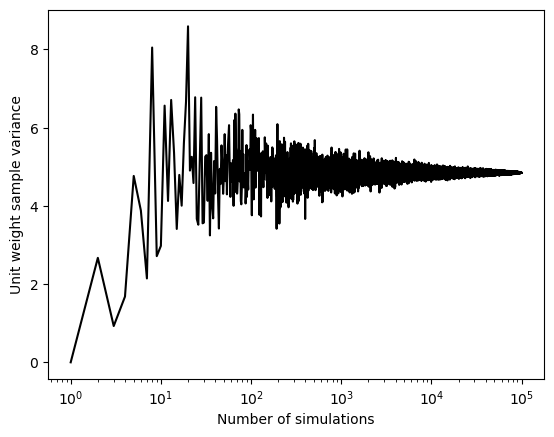

C:\Users\fn20944\AppData\Local\Temp\ipykernel_20088\814561038.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sample_second_moment=scipy.stats.moment(realisations[i], moment=2)


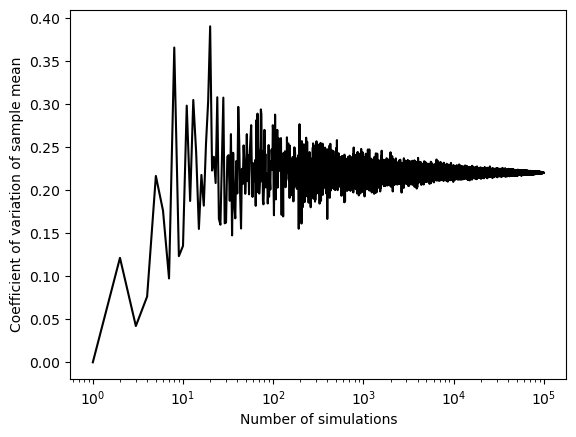

C:\Users\fn20944\AppData\Local\Temp\ipykernel_20088\3056112189.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sample_fourth_moment=scipy.stats.moment(realisations[i], moment=4)


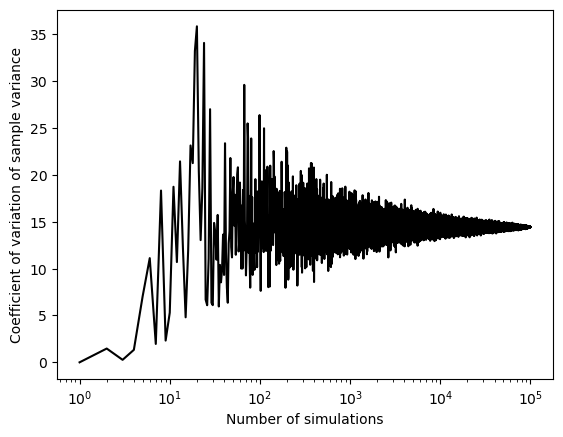

Stored 'masonry_unit_weight_realisations' (ndarray)
Stored 'convergence_simulation_number' (int)
3.45 3.95 3.70
A_e =  12.254174844408688
A_i =  9.348201639838129
A =  2.905973204570559
xp =  2.36
{'H_a': array([40.52707914, 33.18183373, 41.70488939, ..., 40.36429975,
       39.12373951, 45.83523817]), 'V_a': array([62.90127388, 51.50086451, 64.72932976, ..., 62.64862724,
       60.72317835, 71.13996199]), 'S_a': array([74.82656212, 61.26477891, 77.00119435, ..., 74.52601686,
       72.23552715, 84.62720159])}
Stored 'compressive_demand_from_arch' (dict)
Stored 'compressive_demand_from_backfill' (dict)
x_sw =  3.80
xp_sw =  1.00
[56.10087926 45.93299314 57.73130001 ... 55.8755468  54.15826241
 63.44886473]
Stored 'compressive_demand_from_spandrel_walls' (dict)
Stored 'compressive_demand_from_parapet' (dict)
Variable                                      Type        Data/Info
-------------------------------------------------------------------
arch_compressive_demand_from_arch            

In [3]:
%run -i six_unit_weight_sampling.ipynb
%run -i seven_arch_compressive_demand_from_arch.ipynb
%run -i eight_arch_compressive_demand_from_backfill.ipynb
%run -i nine_arch_compressive_demand_from_spandrel_walls.ipynb
%run -i ten_arch_compressive_demand_from_parapets.ipynb
%run -i eleven_arch_compressive_total_demand.ipynb

In [4]:
%store -r convergence_simulation_number
%store -r df_arch_compressive_capacity
%store -r arch_compressive_demand_thrust

In [5]:
%store -r pier_local_scour_depth

In [6]:
# #Variables declared for code developing purposes
# example_number = 2
# arch_compressive_capacity = np.zeros((example_number, convergence_simulation_number)) #https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
# arch_compressive_demand_thrust = np.random.normal(200, 100, convergence_simulation_number)

In [7]:
#five_arch_capacity gives a dataframe as capacity output
arch_compressive_capacity = df_arch_compressive_capacity.iloc[:,2:] #https://towardsdatascience.com/extract-rows-columns-from-a-dataframe-in-python-r-678e5b6743d6
print(type(arch_compressive_capacity))

<class 'pandas.core.frame.DataFrame'>


In [8]:
arch_compressive_capacity_array = np.array(arch_compressive_capacity)
print(arch_compressive_capacity_array.shape)
print(arch_compressive_capacity_array[:5,:])

(10, 100000)
[[ 875.1511557   635.26443687  913.61699622 ...  869.83498049
   829.31980242 1048.50912856]
 [ 875.1511557   635.26443687  913.61699622 ...  869.83498049
   829.31980242 1048.50912856]
 [ 875.1511557   635.26443687  913.61699622 ...  869.83498049
   829.31980242 1048.50912856]
 [ 875.1511557   635.26443687  913.61699622 ...  869.83498049
   829.31980242 1048.50912856]
 [ 804.30558596  583.83826817  839.65752509 ...  799.41976778
   762.18438984  963.62981815]]


In [9]:
print(arch_compressive_demand_thrust.shape)
arch_compressive_demand_thrust_expanded = np.expand_dims(arch_compressive_demand_thrust, 1)
print(arch_compressive_demand_thrust_expanded.shape)
print(arch_compressive_demand_thrust_expanded[0:10])

(100000,)
(100000, 1)
[[525.16363953]
 [492.96620384]
 [530.32649903]
 [525.13280045]
 [524.44464022]
 [520.14672267]
 [513.17464392]
 [533.55410576]
 [518.58661431]
 [516.834431  ]]


In [10]:
arch_compressive_capacity_array_transposed = arch_compressive_capacity_array.T
print(arch_compressive_capacity_array_transposed.shape)

(100000, 10)


In [11]:
arch_compressive_limit_state_equation = []

In [12]:
for i in range(arch_compressive_capacity_array.shape[0]):
    compressive_limit_state_equation = arch_compressive_capacity_array_transposed[:,[i]] - arch_compressive_demand_thrust_expanded
    arch_compressive_limit_state_equation.append(compressive_limit_state_equation)

print(len(arch_compressive_limit_state_equation))
print(arch_compressive_limit_state_equation[0:5])

10
[array([[349.98751618],
       [142.29823303],
       [383.29049718],
       ...,
       [345.38487446],
       [310.30761662],
       [500.07749733]]), array([[349.98751618],
       [142.29823303],
       [383.29049718],
       ...,
       [345.38487446],
       [310.30761662],
       [500.07749733]]), array([[349.98751618],
       [142.29823303],
       [383.29049718],
       ...,
       [345.38487446],
       [310.30761662],
       [500.07749733]]), array([[349.98751618],
       [142.29823303],
       [383.29049718],
       ...,
       [345.38487446],
       [310.30761662],
       [500.07749733]]), array([[279.14194643],
       [ 90.87206433],
       [309.33102606],
       ...,
       [274.96966175],
       [243.17220404],
       [415.19818692]])]


In [13]:
arch_compressive_limit_state_equation_array = np.array(arch_compressive_limit_state_equation)
print(arch_compressive_limit_state_equation_array)

[[[ 349.98751618]
  [ 142.29823303]
  [ 383.29049718]
  ...
  [ 345.38487446]
  [ 310.30761662]
  [ 500.07749733]]

 [[ 349.98751618]
  [ 142.29823303]
  [ 383.29049718]
  ...
  [ 345.38487446]
  [ 310.30761662]
  [ 500.07749733]]

 [[ 349.98751618]
  [ 142.29823303]
  [ 383.29049718]
  ...
  [ 345.38487446]
  [ 310.30761662]
  [ 500.07749733]]

 ...

 [[ -45.91419712]
  [-145.08329793]
  [ -30.01242968]
  ...
  [ -48.11190243]
  [ -64.86086543]
  [  25.75193917]]

 [[-154.26624497]
  [-223.73508536]
  [-143.12691492]
  ...
  [-155.80575716]
  [-167.53855526]
  [-104.06347674]]

 [[-262.61829282]
  [-302.38687278]
  [-256.24140017]
  ...
  [-263.49961188]
  [-270.21624508]
  [-233.87889266]]]


In [14]:
arch_compressive_limit_state_equation_array.shape

(10, 100000, 1)

In [15]:
print(arch_compressive_limit_state_equation_array.shape[0])
print(arch_compressive_limit_state_equation_array.shape[1])

10
100000


In [16]:
arch_compressive_limit_state_equation_array_reshaped = arch_compressive_limit_state_equation_array.reshape(arch_compressive_limit_state_equation_array.shape[0], arch_compressive_limit_state_equation_array.shape[1])

In [17]:
arch_compressive_failure_points = arch_compressive_limit_state_equation_array_reshaped<=0
print(arch_compressive_failure_points)
print(arch_compressive_failure_points.shape)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ...  True  True False]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
(10, 100000)


In [18]:
arch_compressive_failure_points_number = []

In [19]:
for i in range(arch_compressive_limit_state_equation_array.shape[0]):
    compressive_failure_points_number = np.count_nonzero(arch_compressive_failure_points[i, :])
    arch_compressive_failure_points_number.append(compressive_failure_points_number)

In [20]:
arch_compressive_failure_points_number

[69, 69, 69, 69, 259, 1880, 15286, 74760, 99995, 100000]

In [21]:
arch_compressive_failure_probability_data = []

In [22]:
for i in range(len(arch_compressive_failure_points_number)):
    failure_probability_data = arch_compressive_failure_points_number[i]/convergence_simulation_number
    arch_compressive_failure_probability_data.append(failure_probability_data)

In [23]:
# https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
xs = []
ys = []

In [24]:
for i in range(len(arch_compressive_failure_probability_data)):
    rounded_xs = round(pier_local_scour_depth[0][i], 2)
    rounded_ys = round(arch_compressive_failure_probability_data[i], 4) #https://stackoverflow.com/questions/3400965/getting-only-1-decimal-place
    xs.append(rounded_xs)
    ys.append(rounded_ys)

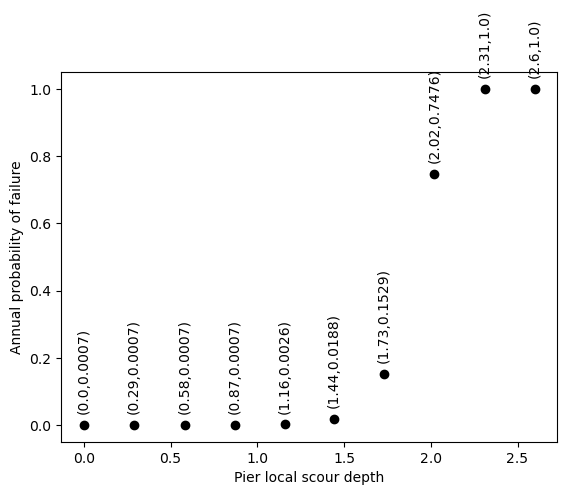

In [28]:
plt.scatter(xs, ys, color = 'black')
plt.ylim([-0.05, 1.05])
plt.xlabel('Pier local scour depth')
plt.ylabel('Annual probability of failure')

for x,y in zip(xs, ys): #https://realpython.com/python-zip-function/#using-zip-in-python
    label = f"({x},{y})"
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center',
                rotation=90)